In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [5]:
data= pd.read_csv('/Users/sarahberkin/Berkin-Data Science Capstone/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data[data.Outcome == '1'].T

""
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [12]:
missing_counts = data.isnull().sum()
missing_percentages = 100 * data.isnull().mean()
missing = pd.concat([missing_counts, missing_percentages], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [14]:
averages_by_outcome = data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].mean()
averages_by_outcome.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


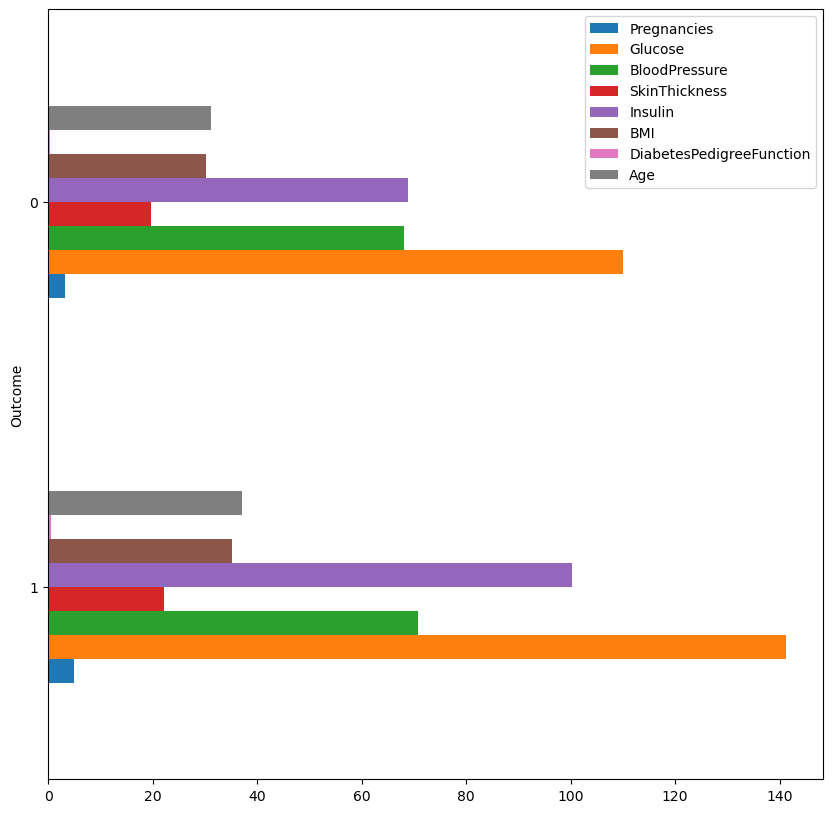

In [16]:
(averages_by_outcome.reindex(index=averages_by_outcome.mean(axis=1).sort_values(ascending=False).index).plot(kind='barh', figsize=(10,10)))
plt.show()

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


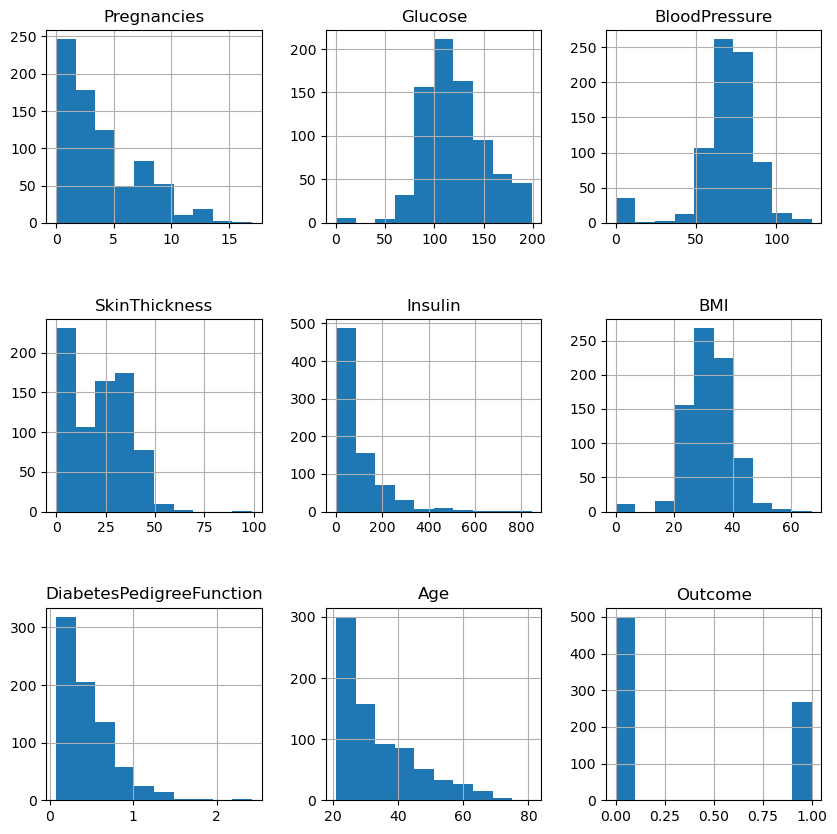

In [20]:
data.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

In [22]:
data[data.Glucose < 40].T

,75,182,342,349,502
Pregnancies,1.00,1.000,1.000,5.000,6.000
Glucose,0.00,0.000,0.000,0.000,0.000
BloodPressure,48.00,74.000,68.000,80.000,68.000
SkinThickness,20.00,20.000,35.000,32.000,41.000
Insulin,0.00,23.000,0.000,0.000,0.000
BMI,24.70,27.700,32.000,41.000,39.000
DiabetesPedigreeFunction,0.14,0.299,0.389,0.346,0.727
Age,22.00,21.000,22.000,37.000,41.000
Outcome,0.00,0.000,0.000,1.000,1.000


In [24]:
data[data.BMI < 10].T

,9,49,60,81,145,371,426,494,522,684,706
Pregnancies,8.000,7.000,2.000,2.000,0.000,0.000,0.000,3.000,6.000,5.00,10.000
Glucose,125.000,105.000,84.000,74.000,102.000,118.000,94.000,80.000,114.000,136.00,115.000
BloodPressure,96.000,0.000,0.000,0.000,75.000,64.000,0.000,0.000,0.000,82.00,0.000
SkinThickness,0.000,0.000,0.000,0.000,23.000,23.000,0.000,0.000,0.000,0.00,0.000
Insulin,0.000,0.000,0.000,0.000,0.000,89.000,0.000,0.000,0.000,0.00,0.000
BMI,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
DiabetesPedigreeFunction,0.232,0.305,0.304,0.102,0.572,1.731,0.256,0.174,0.189,0.64,0.261
Age,54.000,24.000,21.000,22.000,21.000,21.000,25.000,22.000,26.000,69.00,30.000
Outcome,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000


In [26]:
data[data.BloodPressure < 60].T

,4,6,7,15,18,32,46,49,51,55,...,703,706,707,713,715,729,733,741,742,760
Pregnancies,0.000,3.000,10.000,7.000,1.000,3.000,1.000,7.000,1.000,1.000,...,2.000,10.000,2.000,0.000,7.000,2.000,2.000,3.0,1.000,2.000
Glucose,137.000,78.000,115.000,100.000,103.000,88.000,146.000,105.000,101.000,73.000,...,129.000,115.000,127.000,134.000,187.000,92.000,106.000,102.0,109.000,88.000
BloodPressure,40.000,50.000,0.000,0.000,30.000,58.000,56.000,0.000,50.000,50.000,...,0.000,0.000,46.000,58.000,50.000,52.000,56.000,44.0,58.000,58.000
SkinThickness,35.000,32.000,0.000,0.000,38.000,11.000,0.000,0.000,15.000,10.000,...,0.000,0.000,21.000,20.000,33.000,0.000,27.000,20.0,18.000,26.000
Insulin,168.000,88.000,0.000,0.000,83.000,54.000,0.000,0.000,36.000,0.000,...,0.000,0.000,335.000,291.000,392.000,0.000,165.000,94.0,116.000,16.000
BMI,43.100,31.000,35.300,30.000,43.300,24.800,29.700,0.000,24.200,23.000,...,38.500,0.000,34.400,26.400,33.900,30.100,29.000,30.8,28.500,28.400
DiabetesPedigreeFunction,2.288,0.248,0.134,0.484,0.183,0.267,0.564,0.305,0.526,0.248,...,0.304,0.261,0.176,0.352,0.826,0.141,0.426,0.4,0.219,0.766
Age,33.000,26.000,29.000,32.000,33.000,22.000,29.000,24.000,26.000,21.000,...,41.000,30.000,22.000,21.000,34.000,22.000,22.000,26.0,22.000,22.000
Outcome,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.0,0.000,0.000


In [28]:
data[data.Insulin < 10].T

,0,1,2,5,7,9,10,11,12,15,...,754,756,757,758,759,761,762,764,766,767
Pregnancies,6.000,1.000,8.000,5.000,10.000,8.000,4.000,10.000,10.000,7.000,...,8.000,7.000,0.000,1.000,6.000,9.000,9.000,2.00,1.000,1.000
Glucose,148.000,85.000,183.000,116.000,115.000,125.000,110.000,168.000,139.000,100.000,...,154.000,137.000,123.000,106.000,190.000,170.000,89.000,122.00,126.000,93.000
BloodPressure,72.000,66.000,64.000,74.000,0.000,96.000,92.000,74.000,80.000,0.000,...,78.000,90.000,72.000,76.000,92.000,74.000,62.000,70.00,60.000,70.000
SkinThickness,35.000,29.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,32.000,41.000,0.000,0.000,0.000,31.000,0.000,27.00,0.000,31.000
Insulin,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
BMI,33.600,26.600,23.300,25.600,35.300,0.000,37.600,38.000,27.100,30.000,...,32.400,32.000,36.300,37.500,35.500,44.000,22.500,36.80,30.100,30.400
DiabetesPedigreeFunction,0.627,0.351,0.672,0.201,0.134,0.232,0.191,0.537,1.441,0.484,...,0.443,0.391,0.258,0.197,0.278,0.403,0.142,0.34,0.349,0.315
Age,50.000,31.000,32.000,30.000,29.000,54.000,30.000,34.000,57.000,32.000,...,45.000,39.000,52.000,26.000,66.000,43.000,33.000,27.00,47.000,23.000
Outcome,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,...,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.00,1.000,0.000


In [30]:
data_0s = data.copy(deep=True)
data_0s[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_0s[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(data_0s.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [34]:
data_0s['Glucose'].fillna(data_0s['Glucose'].mean())
data_0s['BloodPressure'].fillna(data_0s['BloodPressure'].mean())
data_0s['SkinThickness'].fillna(data_0s['SkinThickness'].median())
data_0s['Insulin'].fillna(data_0s['Insulin'].median())
data_0s['BMI'].fillna(data_0s['BMI'].mean())

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

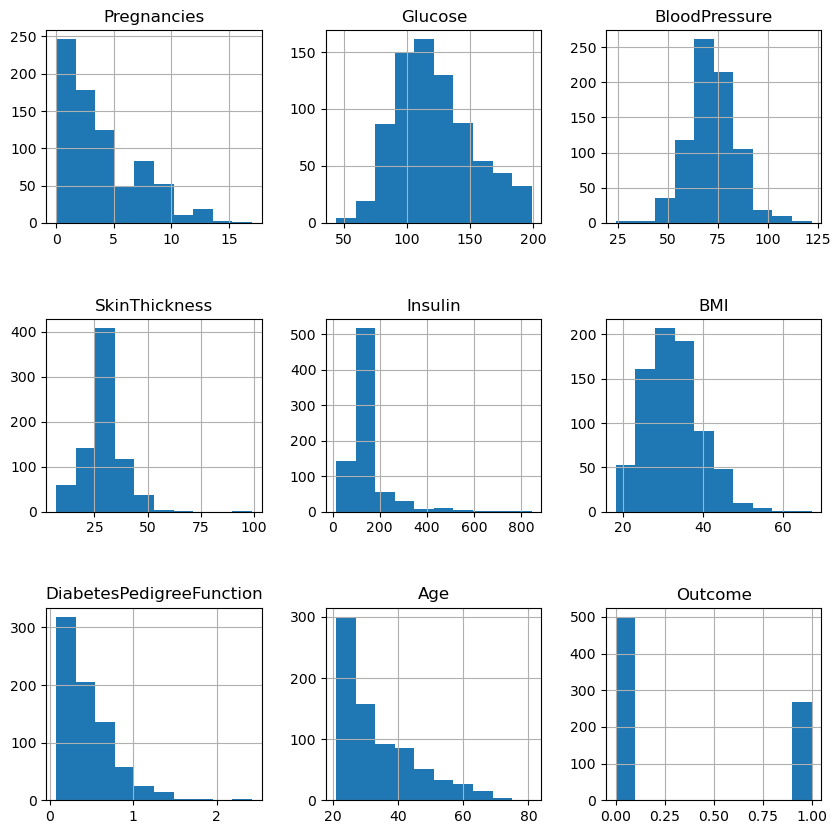

In [36]:
data_0s.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

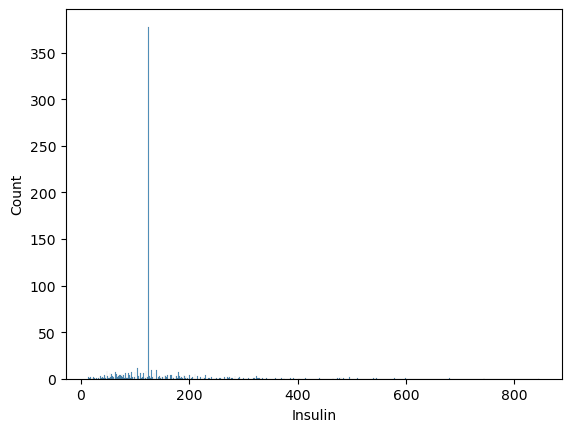

In [40]:
sns.histplot(data_0s['Insulin'])
plt.show()

In [89]:
df = data_0s[data_0s['Insulin'] < 125]

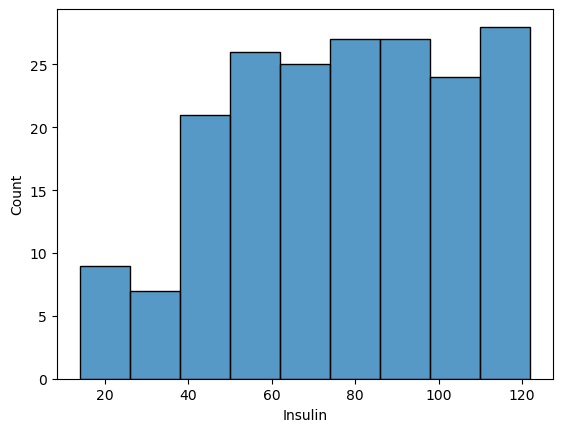

In [91]:
sns.histplot(df['Insulin'])
plt.show()

In [107]:
df = df[df['SkinThickness'] < 70]

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,194.0,2.860825,3.044780,0.000,1.000,2.0000,4.00000,17.00
Glucose,194.0,104.982921,23.112071,56.000,88.250,100.0000,118.00000,180.00
BloodPressure,194.0,68.819588,12.454411,24.000,62.000,70.0000,76.00000,106.00
SkinThickness,194.0,26.891753,10.615446,10.000,18.000,26.0000,33.00000,63.00
Insulin,194.0,76.268041,27.438680,14.000,55.000,76.0000,100.00000,122.00
BMI,194.0,31.324008,7.047918,18.200,26.125,30.6500,35.45000,59.40
DiabetesPedigreeFunction,194.0,0.487809,0.327109,0.089,0.264,0.4095,0.63925,2.42
Age,194.0,28.118557,8.355530,21.000,22.000,25.0000,30.75000,81.00
Outcome,194.0,0.149485,0.357488,0.000,0.000,0.0000,0.00000,1.00


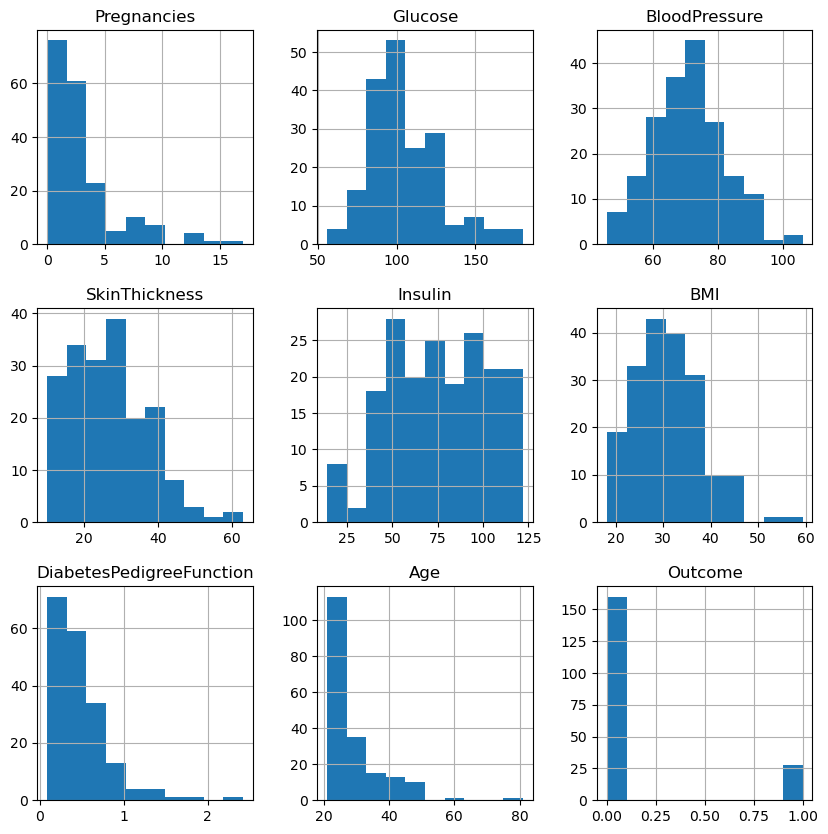

In [145]:
hist = df.hist(bins=10, figsize=(10,10))

In [137]:
print(df.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


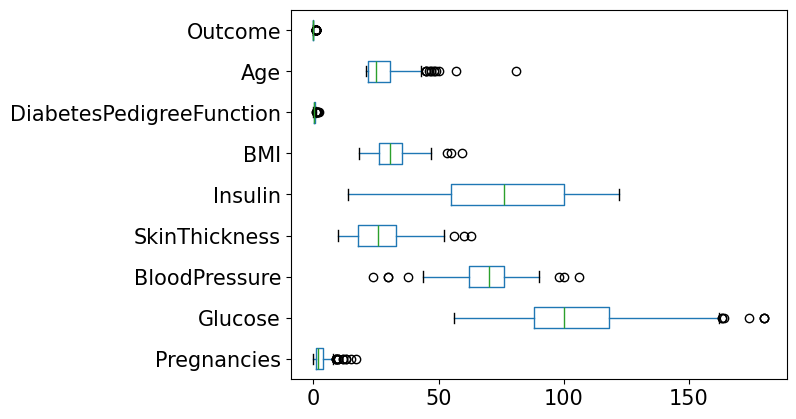

In [139]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15)

In [169]:
df = df[df['BloodPressure'] > 45]
df = df[df['Glucose'] < 160]
df = df[df['SkinThickness'] < 55]
df = df[df['BloodPressure'] < 90]
df = df[df['Age'] < 50]

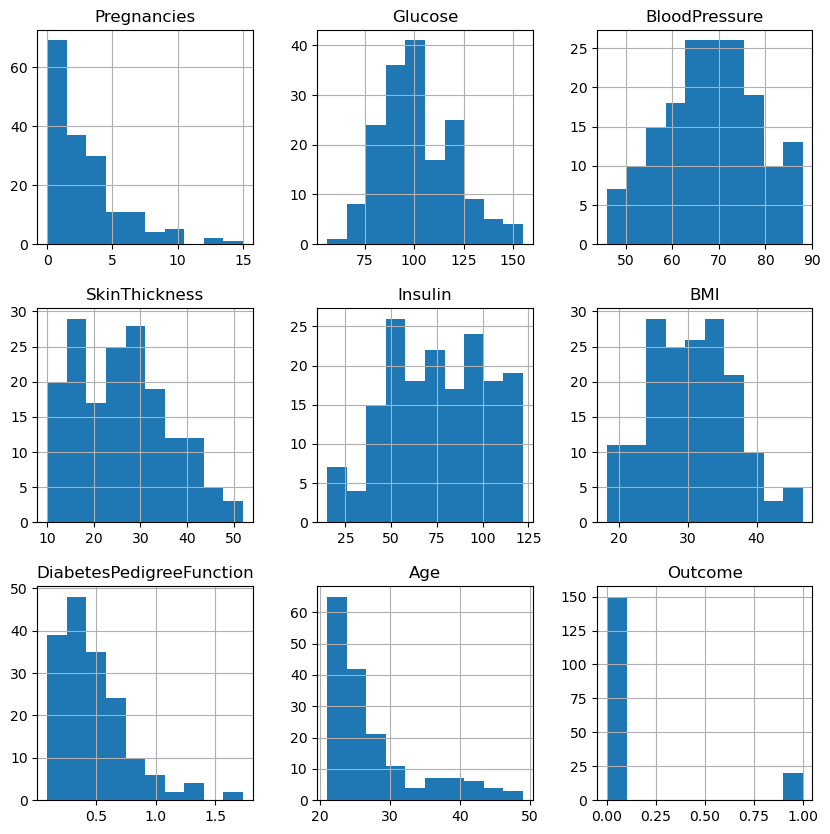

In [171]:
hist1 = df.hist(bins=10, figsize=(10,10))

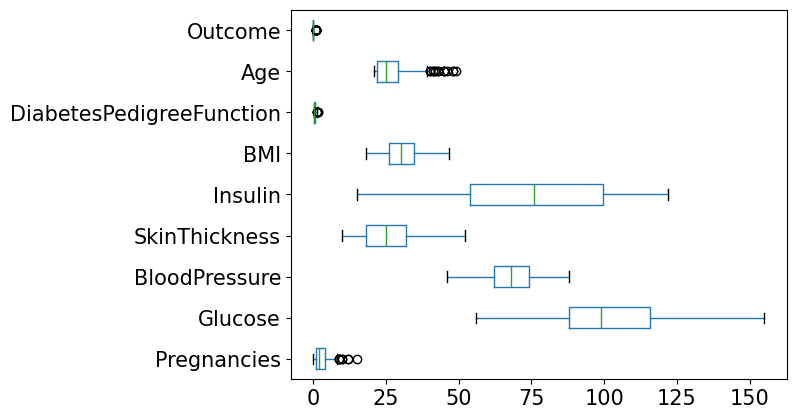

In [173]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15)

I'm choosing to leave in the outliers on pregnancy. I believe that those are legit occurances even though they're outside the norm. Also, I don't want to miss info on gestational diabetes.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Pregnancies'),
  Text(0, 1.5, 'Glucose'),
  Text(0, 2.5, 'BloodPressure'),
  Text(0, 3.5, 'SkinThickness'),
  Text(0, 4.5, 'Insulin'),
  Text(0, 5.5, 'BMI'),
  Text(0, 6.5, 'DiabetesPedigreeFunction'),
  Text(0, 7.5, 'Age'),
  Text(0, 8.5, 'Outcome')])

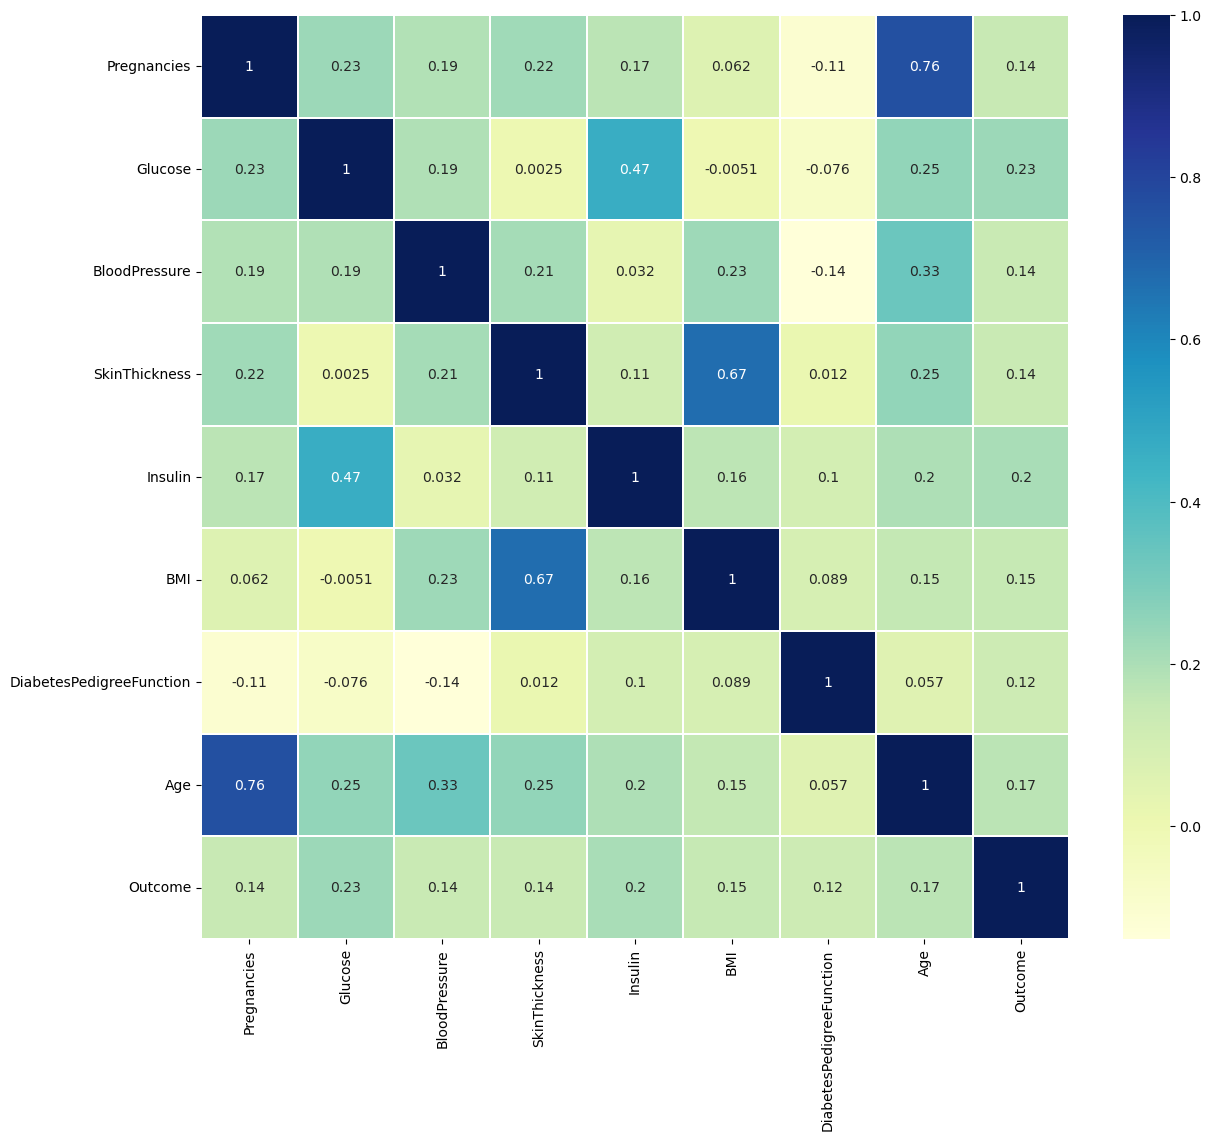

In [175]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

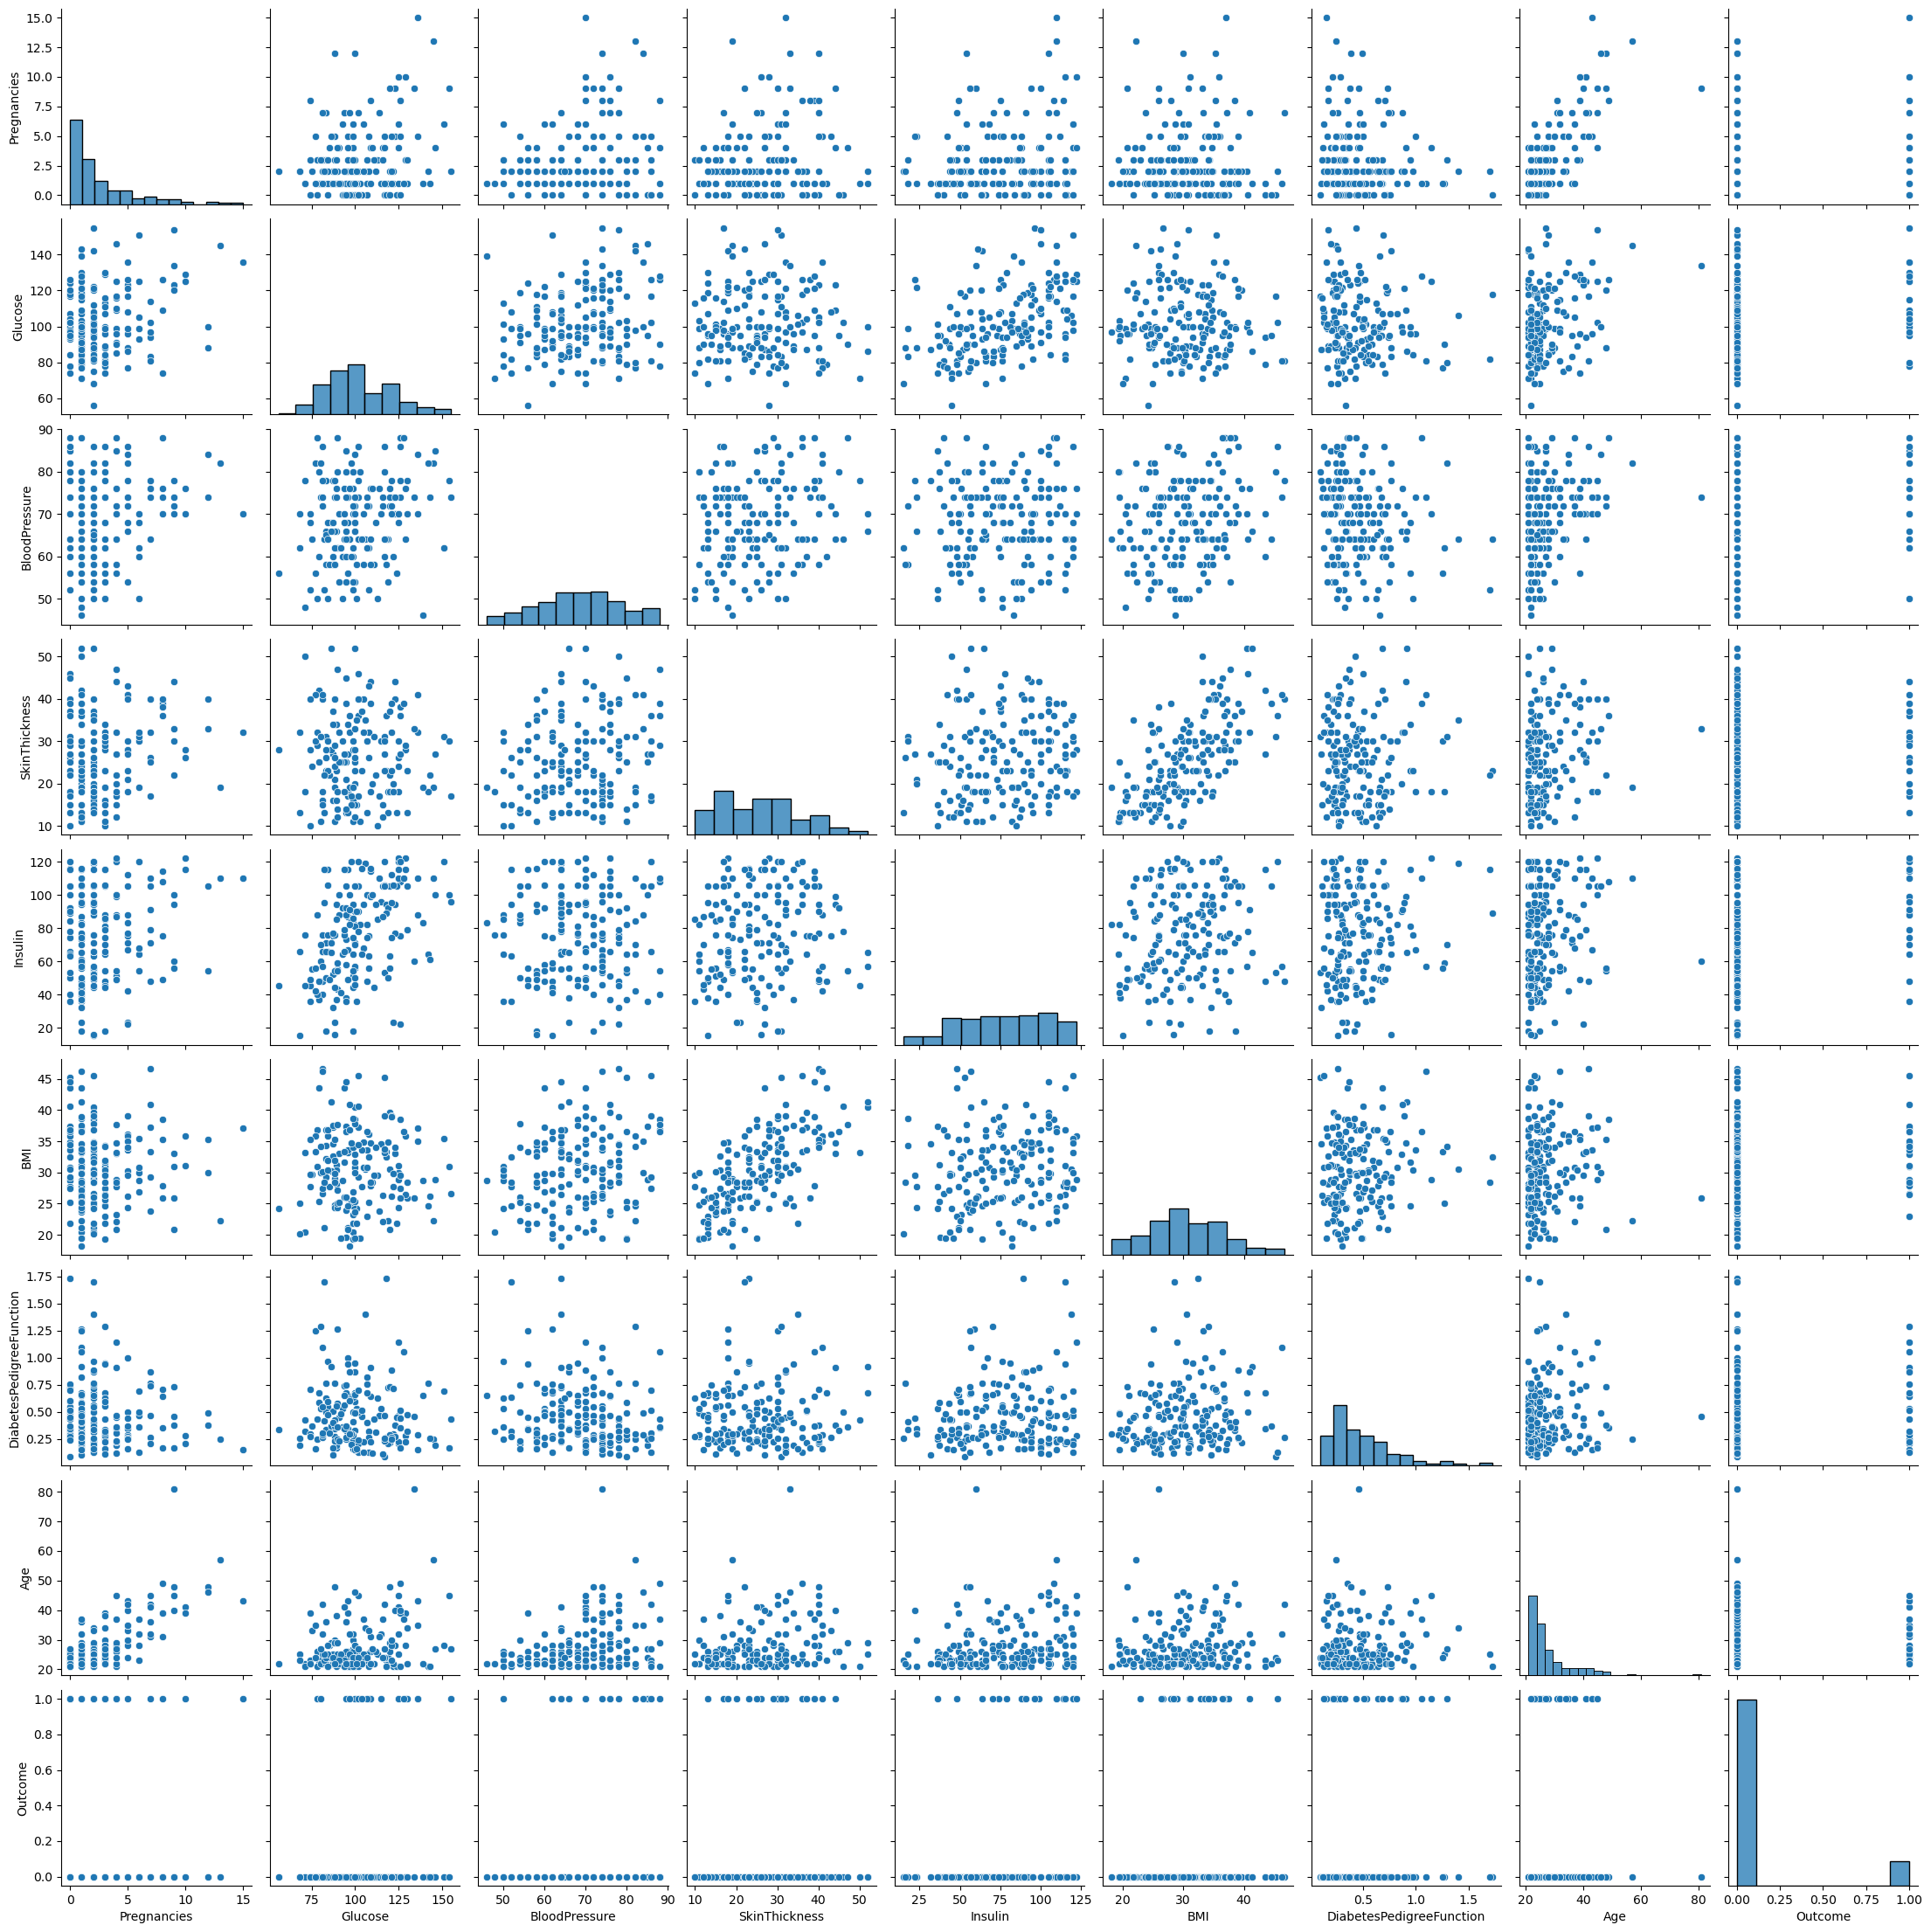

In [163]:
g = sns.pairplot(df)

These results are very interesting! I can get a quick glance of what level diabetes-positive people were at for each variable 

In [179]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_all = sm.OLS(df['Outcome'], df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]).fit()
print(model_all.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.174
Model:                            OLS   Adj. R-squared (uncentered):              0.133
Method:                 Least Squares   F-statistic:                              4.259
Date:                Sun, 26 Jan 2025   Prob (F-statistic):                    0.000115
Time:                        16:09:49   Log-Likelihood:                         -43.087
No. Observations:                 170   AIC:                                      102.2
Df Residuals:                     162   BIC:                                      127.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In an effort to see whether there are instances of a smaller p-value, I'm redoing the model to include only the top 4 variables that in relation to having diabetes from the heatmap-- glucose, insulin, bmi, and age

In [183]:
model_top4 = sm.OLS(df['Outcome'], df[['Glucose', 'Insulin', 'BMI', 'Age']]).fit()
print(model_top4.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.152
Model:                            OLS   Adj. R-squared (uncentered):              0.131
Method:                 Least Squares   F-statistic:                              7.418
Date:                Sun, 26 Jan 2025   Prob (F-statistic):                    1.60e-05
Time:                        17:02:14   Log-Likelihood:                         -45.335
No. Observations:                 170   AIC:                                      98.67
Df Residuals:                     166   BIC:                                      111.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [185]:
model_lower4 = sm.OLS(df['Outcome'], df[['Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']]).fit()
print(model_lower4.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.137
Method:                 Least Squares   F-statistic:                              7.753
Date:                Sun, 26 Jan 2025   Prob (F-statistic):                    9.43e-06
Time:                        17:05:22   Log-Likelihood:                         -44.756
No. Observations:                 170   AIC:                                      97.51
Df Residuals:                     166   BIC:                                      110.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------